In [36]:
##Contributor: Ankita Pal chatterjee

In [1]:
import pandas as pd 

Data = pd.read_csv("Symptoms_Deidentified_10082019_MMH_csv.csv")   # with or without sep='\t'


un_wanted = [ 'MDDDiagnosis',"Past_MDDDiagnosis",'SuicidalityDiagnosis','C3Summary', 'ManiEpisodeDiagnosis', \
 'HypomanicEpisodeDiagnosis','Past_C3Summary','Past_ManiEpisodeDiagnosis', 'Past_HypomanicEpisodeDiagnosis', \
 'Past_HypomanicSymptomsDiagnosis', 'HypomanicSymptomsDiagnosis', 'D5-PanicDisorderLifetimeDiagnosis', \
 'D6-LimitedSymptomAttacksLifetimeDiagnosis', 'D7-PanicDisorderCurrentDiagnosis',  'E2-AgoraphobiaCurrentDiagnosis', \
 'PastSymptomsOnly','PanicDisorderWithAgoraphobiaCurrentDiagnosis','PanicDisorderWithoutAgoraphobiaCurrentDiagnosis',\
 'AgoraphobiaCurrentWithoutHistoryOfPanicDisorder-Diagnosis', 'F4-SocialPhobiaCurrentDiagnosis',\
 'SUBTYPES','PastSymptomsOnly.1',  'G6-OCDDiagnosis',\
 'PastSymptomsOnly.2', 'PastSymptomsOnly.3',  'AlcoholDependenceCurrentDiagnosis',\
 'PastSymptomsOnly.4', 'AlcoholAbuseCurrentDiagnosis',\
 'PastSymptomsOnly.5', 'SymptomsInOneMonth', 'K11b-MoodDisorderWithPsychoticFeaturesLifetimeDiagnosis',\
 'K12a-MoodDisorderWithPsychoticFeaturesCurrentDiagnosis',\
 'K13-PsychoticDisorderCurrentDiagnosis',\
 'K14-PsychoticDisorderLifetimeDiagnosis', 'AnorexiaDiagnosis',\
 'PastSymptomsOnly.6', 'BulemiaDiagnosis',\
 'PastSymptomsOnly.7', 'PastSymptomsOnly.8']

cognitive_features = list(Data.columns)[-16:]

disease_symp_ =  list(Data.columns)[26:-16]             # sym features without filtering    235

sym_features = list(set(disease_symp_) - set(un_wanted))  # sym features without filtering    196


In [2]:
len(sym_features)

196

In [3]:
cognitive_features

['B1RewCor',
 'B2RewCor',
 'B3RewCor',
 'B4RewCor',
 'B1PunCor',
 'B2PunCor',
 'B3PunCor',
 'B4PunCor',
 'B1RewResT',
 'B2RewResT',
 'B3RewResT',
 'B4RewResT',
 'B1PunResT',
 'B2PunResT',
 'B3PunResT',
 'B4PunResT']

## Symptoms Data 

In [4]:
sym_data = Data[sym_features]  
#labels, uniques = pd.factorize(sym_data)
sym_data = sym_data.fillna(0)
#print (sym_data.stack().rank(method='dense').unstack())

#sym_data[]
sym_data_ = sym_data
for col in sym_data.columns:
    sym_data_[str(col)]= sym_data[str(col)].map({'Yes':1, 'No':-1, 'Bizarre':2})
sym_data_ = sym_data_.fillna(0)                                  # final quantified sym data
sym_data_

,D4k,D1b,H2,C3d,D4h,M8,K2b,Past_A5,P2e,D4i,...,B14,G5,B12,K1NAb,C4c,I3a,P1d,Past_A3f,K6b,L1
0,0.0,1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,0.0
1,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0
2,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,...,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
3,1.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,0.0
4,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
107,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0
108,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
109,0.0,-1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0


In [5]:
sym_data_.shape[0]

111

In [6]:
# PCA
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
from sklearn.decomposition import PCA

num_vars = sym_data_.values.shape[1]
num_obs = sym_data_.values.shape[0]

pca = PCA(svd_solver='full')
pca.fit_transform(sym_data_.values)
eigvals = pca.explained_variance_
#print(eigvals)
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
sing_vals = np.arange(num_obs) + 1

fig = plt.figure(figsize=(8,5))
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),               
                 markerscale=0.4)                                                                                             
leg.get_frame().set_alpha(0.4)                                
#leg.draggable(state=True)    
plt.show()                    

cog_mapping = pca.components_

<Figure size 800x500 with 1 Axes>

[11.57 19.15 25.35 30.62 35.16 39.05 42.81 46.21 49.44 52.37 55.23 57.67
 59.82 61.88 63.83 65.66 67.45 69.14 70.72 72.22 73.54 74.85 76.06 77.26
 78.36 79.44 80.51 81.53 82.52 83.44 84.34 85.16 85.92 86.63 87.3  87.96
 88.59 89.22 89.78 90.33 90.85 91.35 91.81 92.25 92.69 93.11 93.51 93.89
 94.26 94.62 94.97 95.31 95.62 95.91 96.19 96.45 96.68 96.9  97.11 97.31]


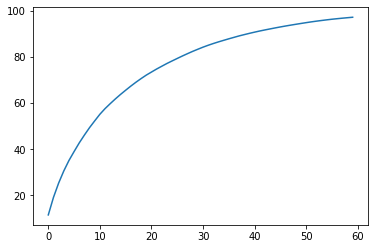

In [7]:
from sklearn.preprocessing import scale
#convert it to numpy arrays
X=sym_data_.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=60)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)

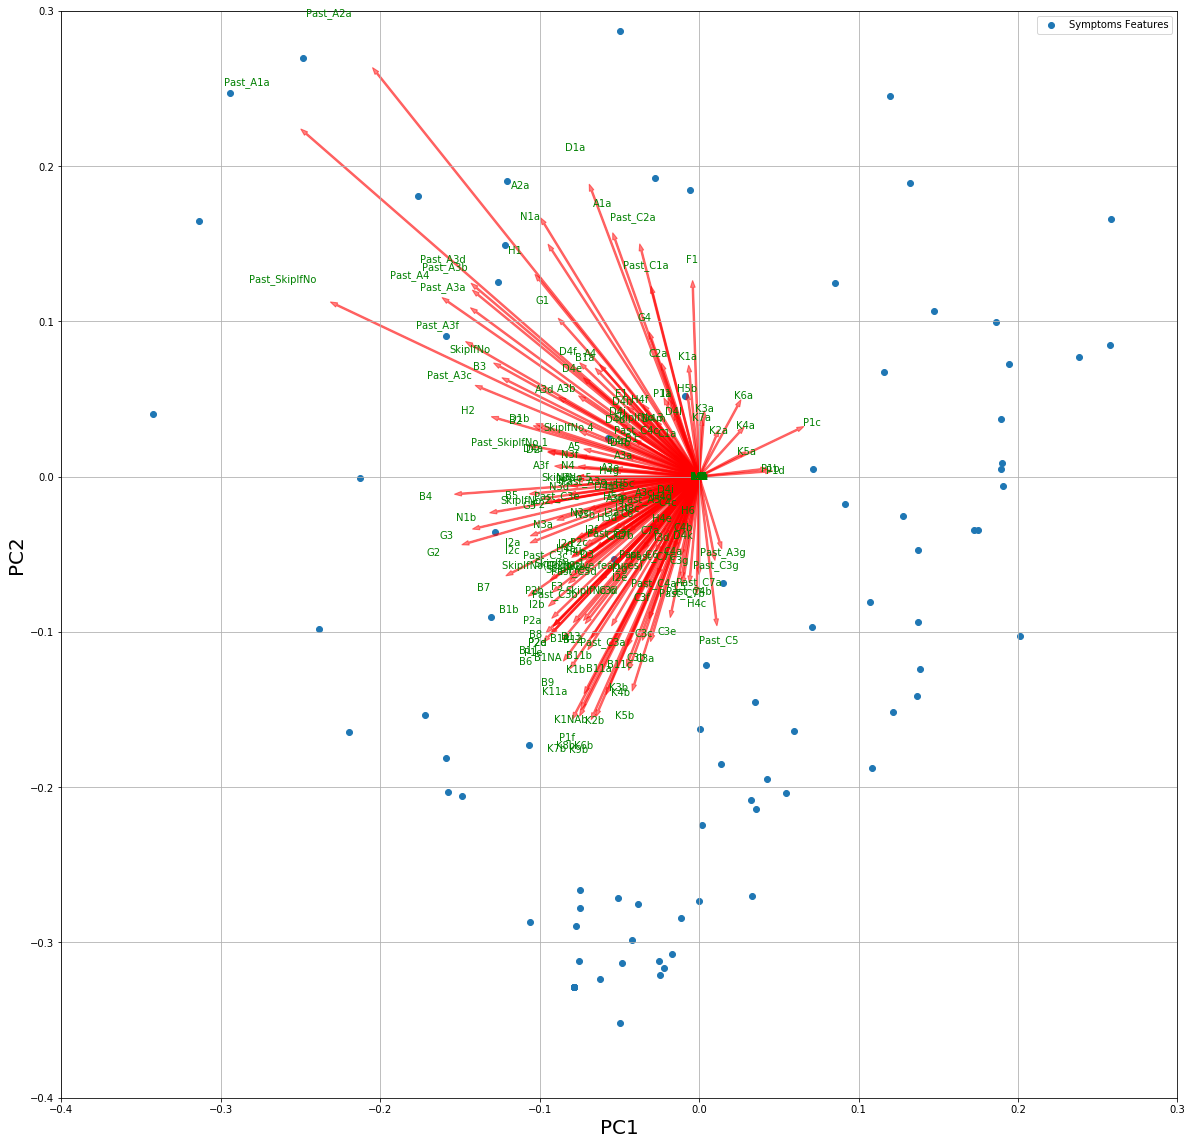

(2, 196)

In [8]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn import datasets
#from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(20,20))

num_vars = sym_data_.values.shape[1]
num_obs = sym_data_.values.shape[0]
pca = PCA(n_components=111,svd_solver='full')
x_new = pca.fit_transform(sym_data_.values)
variables = list(sym_data_.columns)


def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(variables[i]), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.4,0.3)
    plt.ylim(-0.4,0.3)
    #plt.xlabel("PC{}".format(1))
    #plt.ylabel("PC{}".format(2))
    
    plt.xlabel("PC1", fontsize=20)
    plt.ylabel("PC2",fontsize=20)
    plt.legend(['Symptoms Features'])

    plt.grid()

#Call the function. Use only the 2 PCs.
biplot(x_new[:,[0,1]],np.transpose(pca.components_[[0,1], :]))
#plt.savefig('/loading_sym_pc1_pc2.png', dpi=500)

plt.show()

pca.components_[[0,1]].shape

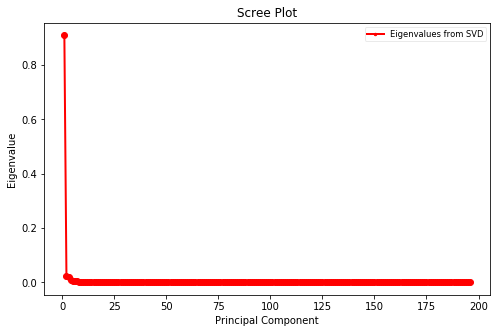

In [9]:
# SVD for symptoms 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = sym_data_.values.shape[1]
num_obs = sym_data_.values.shape[0]
A = sym_data_.values
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

## Cognitive features 

In [10]:
cog_data = Data[cognitive_features]  
cog_data = cog_data.fillna(0)

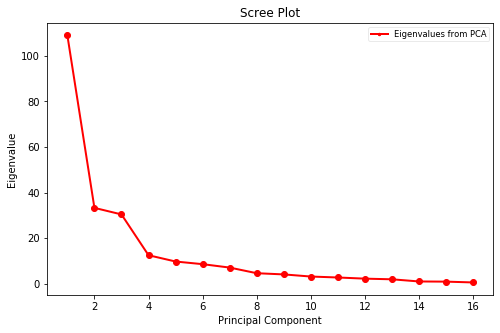

In [11]:
# PCA

import numpy as np
from sklearn.decomposition import PCA

num_vars = cog_data.values.shape[1]
num_obs = cog_data.values.shape[0]

pca = PCA(svd_solver='full')
pca.fit(cog_data.values)
eigvals = pca.explained_variance_
sing_vals = np.arange(num_vars) + 1

fig = plt.figure(figsize=(8,5))
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

#                                                                 
cog_mapping_2 = pca.components_                              



### Loading plot for PCA

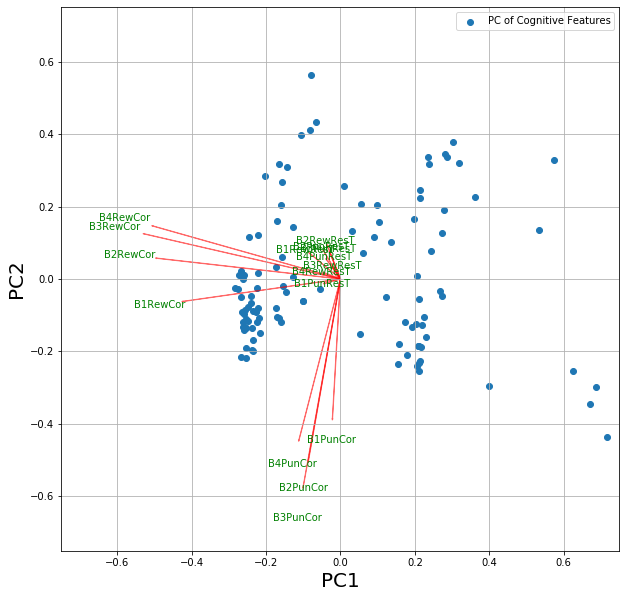

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,10))


pca = PCA(svd_solver='full')
x_new = pca.fit_transform(cog_data.values)
variables = list(cog_data.columns)


def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(variables[i]), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75)
    plt.ylim(-0.75,0.75)
    plt.xlabel("PC1", fontsize=20)
    plt.ylabel("PC2",fontsize=20)
    
    
    plt.legend(['PC of Cognitive Features'])
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,[0,1]],np.transpose(pca.components_[[0,1], :]))
#plt.savefig('/home/maburid/NIH_Grant/loading_cog_pc1_pc2.png', dpi=500)

plt.show()


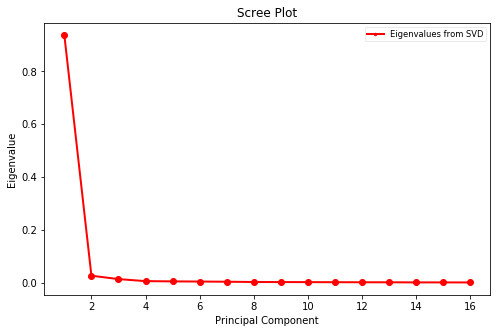

In [13]:
# SVD 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = cog_data.values.shape[1]
num_obs = cog_data.values.shape[0]
A = cog_data.values
#A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A, full_matrices=True) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()




### Loading Plots for SVD 

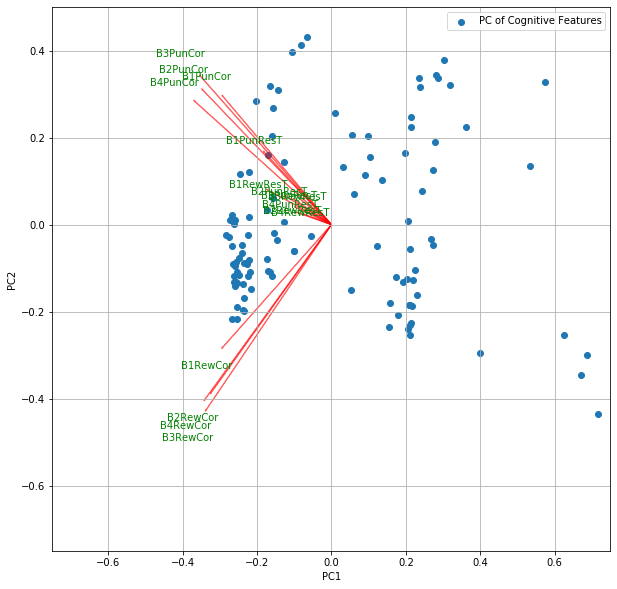

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,10))


pca = PCA(svd_solver='full')
x_new = pca.fit_transform(cog_data.values)
variables = list(cog_data.columns)


def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(variables[i]), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75) 
    plt.ylim(-0.75,0.5) 
    plt.xlabel("PC{}".format(1))   
    plt.ylabel("PC{}".format(2))  
    plt.legend(['PC of Cognitive Features'])           
    plt.grid() 

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(V[0:2,:]))                                 
#plt.savefig('/home/maburid/NIH_Grant/loading_cog_SVD.png', dpi=500)

plt.show()

In [15]:
cog_mapping
cog_mapping_2

array([[-4.22540630e-01, -4.93541242e-01, -5.26799456e-01,
        -5.03566750e-01, -2.15144208e-02, -8.62901680e-02,
        -1.00240717e-01, -1.11500603e-01, -8.22040376e-02,
        -3.46431192e-02, -1.94242436e-02, -4.43886083e-02,
        -4.25533635e-02, -4.53689102e-02, -2.86207959e-02,
        -3.73670262e-02],
       [-6.17427082e-02,  5.73510675e-02,  1.24328066e-01,
         1.46039182e-01, -3.85123533e-01, -5.02474435e-01,
        -5.73812521e-01, -4.44002235e-01,  7.04325918e-02,
         9.15405199e-02,  3.06287494e-02,  1.75880234e-02,
        -1.21609253e-02,  7.74344751e-02,  7.30125649e-02,
         5.34003549e-02],
       [-9.00895825e-02, -1.08377239e-01, -5.46569185e-02,
        -4.14729821e-02, -6.94077701e-02,  1.74041649e-02,
         1.41568322e-01,  9.27958107e-02,  5.01731231e-01,
         2.22188887e-01,  2.00251438e-01,  1.71563443e-01,
         5.61244020e-01,  3.65587761e-01,  2.83558229e-01,
         2.04857379e-01],
       [ 5.29635650e-01,  1.14912420e

In [16]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import scipy.signal as ss
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import scipy     
import math      
import random

In [17]:
vec =[]
all_ =[]

for m in range(len(cog_mapping[0])):
    vec =[]
    for n in range(len(cog_mapping)):
        vec.append(cog_mapping[n][m])
    all_.append(vec)

leng =[]
for k in range(len(all_)):
    leng.append(np.linalg.norm(all_[k]))
'''
indc = np.argsort(leng) 
needed =[]
i =0
while len(needed) <16:
    needed.append(indc[len(indc)-1 - i]) 
    i =i+1
    
res_list = [cog_mapping[m][i] for i in needed]
corr =[]
for u in range(len(cog_mapping)):
    m=[]
    res_list = [cog_mapping_2[i] for i in needed]
    for v in range(len(cog_mapping_2)):
        #m.append(np.dot(ai[u],ai[v]))
        m.append(scipy.stats.pearsonr(cog_mapping[u],cog_mapping_2[v])[0])
    corr.append(m)
    
plt.imshow(corr)
plt.show()
'''

'\nindc = np.argsort(leng) \nneeded =[]\ni =0\nwhile len(needed) <16:\n    needed.append(indc[len(indc)-1 - i]) \n    i =i+1\n    \nres_list = [cog_mapping[m][i] for i in needed]\ncorr =[]\nfor u in range(len(cog_mapping)):\n    m=[]\n    res_list = [cog_mapping_2[i] for i in needed]\n    for v in range(len(cog_mapping_2)):\n        #m.append(np.dot(ai[u],ai[v]))\n        m.append(scipy.stats.pearsonr(cog_mapping[u],cog_mapping_2[v])[0])\n    corr.append(m)\n    \nplt.imshow(corr)\nplt.show()\n'

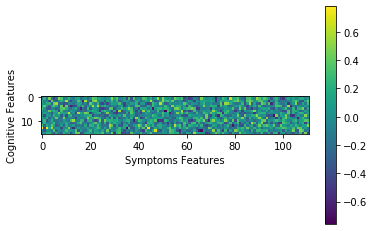

In [18]:
fig, ax = plt.subplots()
#fig.set_figheight(10)
#fig.set_figwidth(30)

#cbar_ax = fig.add_axes([0.14, 0.01, 0.9, 0.02])

indc = np.argsort(leng) 
needed = []
i =0
while len(needed) <16:
    if indc[len(indc)-1 - i] < 60:
        needed.append(indc[len(indc)-1 - i]) 
    i =i+1

corr = []
ii=0
for v in range(len(cog_mapping_2)):                    
    m=[]                     
    for u in range(len(cog_mapping)):  
        res_list = [cog_mapping[u][i] for i in needed] 
        #m.append(np.dot(ai[u],ai[v]))                                 
        m.append(scipy.stats.pearsonr(res_list,cog_mapping_2[v])[0])     
    corr.append(m)
    
im = ax.imshow(corr)
#plt.savefig('/home/maburid/NIH_Grant/heat_map.png', dpi=100)
ax.figure.colorbar( im , ax=ax, orientation = "vertical")

plt.xlabel("Symptoms Features",fontsize=10)                 
plt.ylabel("Cognitive Features",fontsize=10)       

plt.savefig('heat_map.png', dpi=200)

plt.show()

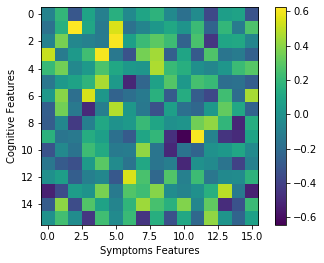

In [19]:
fig, ax = plt.subplots()

indc = np.argsort(leng) 
needed =[]
i =0
while len(needed) <16:
    if indc[len(indc)-1 - i] < 110:
        needed.append(indc[len(indc)-1 - i]) 
    i =i+1

corr =[]
ii=0
for v in range(len(cog_mapping_2)):                                       
    m=[]                                                                   
                            
    for u in range(len(needed)):  
        res_list = [cog_mapping[needed[u]][i] for i in needed] 
        #m.append(np.dot(ai[u],ai[v]))                                 
        m.append(scipy.stats.pearsonr(res_list,cog_mapping_2[v])[0])     
    corr.append(m)
    
#plt.figure(figsize=(5,5))
im = ax.imshow(corr)
#plt.savefig('/home/maburid/NIH_Grant/heat_map.png', dpi=100)

ax.figure.colorbar(im, ax=ax)


plt.xlabel("Symptoms Features",fontsize=10)                 
plt.ylabel("Cognitive Features",fontsize=10)       

plt.savefig('heat_map3.png', dpi=200)


plt.show()

In [20]:
import dowhy
from dowhy import CausalModel
#import dowhy.datasets

data = sym_data_.values
data

array([[ 0.,  1.,  0., ...,  1., -1.,  0.],
       [ 0., -1., -1., ...,  0., -1.,  0.],
       [ 0., -1., -1., ...,  0., -1.,  0.],
       ...,
       [ 0., -1., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [21]:
# Create a causal model from the data and given graph.
model = CausalModel(
    sym_data_.values,
    cog_data.values)

# Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

TypeError: __init__() missing 1 required positional argument: 'outcome'

In [22]:
Data

,FinalID,Age,Gender,MDD-Current(Major Depression disorder),MDD-Past,MDD-Recurrent,Suicidality,Mania-Current,Hypomania-Current,Hypomanic Symptoms-Current,...,B3PunCor,B4PunCor,B1RewResT,B2RewResT,B3RewResT,B4RewResT,B1PunResT,B2PunResT,B3PunResT,B4PunResT
0,S_2,29,Male,Yes,Yes,Yes,Low,No,No,No,...,14,10,12.521538,5.077895,4.452,4.188000,13.925000,8.477143,8.018571,13.020000
1,S_9,21,Male,No,No,No,No,No,No,No,...,20,20,7.600000,4.728000,3.282,4.611000,9.264000,5.232632,5.637000,5.823000
2,S_10,21,Male,No,No,No,No,No,No,No,...,20,18,8.406000,3.228000,2.577,3.039000,17.086667,3.420000,4.710000,2.386667
3,S_11,21,Male,No,Yes,No,No,No,No,No,...,20,20,7.768235,7.143000,5.091,3.729000,10.290000,5.985882,3.750000,3.786000
4,S_12,21,Male,No,No,No,No,No,No,No,...,19,20,8.226000,3.414000,5.100,3.834000,6.021176,4.773000,3.874737,3.354000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,S_159,18,female,No,No,No,No,No,No,No,...,14,15,2.683636,2.068000,2.528,2.035714,5.345455,1.940000,2.391429,2.148000
107,S_160,18,Female,Yes,No,No,No,No,No,No,...,12,20,6.808000,4.460000,2.628,2.160000,6.112500,4.585714,4.455000,3.435000
108,S_162,20,F,No,No,No,No,No,No,No,...,18,19,3.600000,2.139000,2.430,2.463000,4.346250,3.429000,3.070000,3.514737
109,S_163,20,Female,No,No,No,No,No,No,No,...,19,18,4.251429,2.775789,2.670,1.818000,4.386667,2.378824,2.718947,2.693333


In [23]:
from statsmodels.tsa.stattools import grangercausalitytests

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
def grangers_causation_mat(cog_data, variables, test='ssr_chi2test',maxlag=15, addconst=True, verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(cog_data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_mat(cog_data, variables = cog_data.columns)

,B1RewCor_x,B2RewCor_x,B3RewCor_x,B4RewCor_x,B1PunCor_x,B2PunCor_x,B3PunCor_x,B4PunCor_x,B1RewResT_x,B2RewResT_x,B3RewResT_x,B4RewResT_x,B1PunResT_x,B2PunResT_x,B3PunResT_x,B4PunResT_x
B1RewCor_y,1.0000,0.3242,0.3331,0.5413,0.4716,0.2752,0.3852,0.4598,0.0007,0.0044,0.0047,0.2719,0.1215,0.0844,0.1037,0.1258
B2RewCor_y,0.0822,1.0000,0.0772,0.4266,0.4515,0.0931,0.5673,0.5007,0.0094,0.0004,0.0016,0.2703,0.0195,0.1355,0.0226,0.1330
B3RewCor_y,0.0062,0.1145,1.0000,0.3485,0.4578,0.2266,0.3779,0.0284,0.0035,0.0005,0.0012,0.1549,0.0663,0.1003,0.0507,0.0245
B4RewCor_y,0.0395,0.2334,0.1193,1.0000,0.2604,0.1925,0.4388,0.0517,0.0041,0.0096,0.0037,0.1374,0.0275,0.0664,0.1255,0.0126
B1PunCor_y,0.0735,0.0108,0.0223,0.1373,1.0000,0.0085,0.0018,0.0103,0.0246,0.0007,0.0086,0.0937,0.0000,0.0291,0.2284,0.0406
B2PunCor_y,0.0215,0.0891,0.0876,0.2524,0.0033,1.0000,0.0128,0.0031,0.0136,0.0037,0.0070,0.3973,0.0371,0.1372,0.2530,0.3853
B3PunCor_y,0.1383,0.1659,0.1895,0.3015,0.0081,0.2360,1.0000,0.1010,0.2074,0.0382,0.0923,0.1348,0.1463,0.0713,0.2455,0.1568
B4PunCor_y,0.1708,0.0870,0.0744,0.0834,0.0739,0.3349,0.4393,1.0000,0.2429,0.0421,0.0142,0.0945,0.2583,0.3745,0.3214,0.0421
B1RewResT_y,0.1872,0.2385,0.1225,0.0685,0.1846,0.0215,0.2418,0.2041,1.0000,0.6816,0.4250,0.2174,0.0252,0.5052,0.1169,0.0006
B2RewResT_y,0.0024,0.0025,0.0138,0.0070,0.0073,0.0327,0.0480,0.1477,0.1065,1.0000,0.7098,0.0320,0.3768,0.2284,0.0196,0.3377


In [27]:
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causation_mat(sym_data_, variables, test='ssr_chi2test',maxlag=15, addconst=True, verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(sym_data_[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
sym_data = sym_data.fillna(0)
grangers_causation_mat(sym_data_, variables = sym_data_.columns)

C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: RuntimeWarning: invalid value encountered in double_scalars
  res2djoint.ssr / mxlg * res2djoint.df_resid)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1288: RuntimeWarning: invalid value encountered in double_scalars
  fgc2 = res2down.nobs * (res2down.ssr - res2djoint.ssr) / r

KeyboardInterrupt: 

In [30]:
#print(grangercausalitytests(sym_data_,maxlag = 15,addconst=True, verbose=True))
#data = np.asarray(Data[:,4:6])
print(grangercausalitytests (sym_data_.values[:,5:7], maxlag = 15, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=nan     , p=nan     , df_denom=108, df_num=1
ssr based chi2 test:   chi2=nan     , p=nan     , df=1
likelihood ratio test: chi2=nan     , p=nan     , df=1
parameter F test:         F=nan     , p=nan     , df_denom=108, df_num=0

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=nan     , p=nan     , df_denom=106, df_num=2
ssr based chi2 test:   chi2=nan     , p=nan     , df=2
likelihood ratio test: chi2=nan     , p=nan     , df=2
parameter F test:         F=nan     , p=nan     , df_denom=106, df_num=0

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=nan     , p=nan     , df_denom=104, df_num=3
ssr based chi2 test:   chi2=nan     , p=nan     , df=3
likelihood ratio test: chi2=nan     , p=nan     , df=3
parameter F test:         F=nan     , p=nan     , df_denom=104, df_num=0

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=nan     , p=nan     

C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\palan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


In [45]:
len(sym_data_.values[0:16,0])

In [ ]:
len(cog_data.values[0])

In [50]:
Data.values[0:16,5]

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No'], dtype=object)

In [ ]:
cog_data.values[0]

In [34]:
print(grangercausalitytests (sym_data_.values[:50,10:12], maxlag= 15, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4697  , p=0.2316  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=1.5655  , p=0.2109  , df=1
likelihood ratio test: chi2=1.5410  , p=0.2145  , df=1
parameter F test:         F=1.4697  , p=0.2316  , df_denom=46, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6309  , p=0.5370  , df_denom=43, df_num=2
ssr based chi2 test:   chi2=1.4086  , p=0.4945  , df=2
likelihood ratio test: chi2=1.3883  , p=0.4995  , df=2
parameter F test:         F=0.6309  , p=0.5370  , df_denom=43, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5413  , p=0.6568  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=1.9079  , p=0.5917  , df=3
likelihood ratio test: chi2=1.8702  , p=0.5998  , df=3
parameter F test:         F=0.5413  , p=0.6568  , df_denom=40, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6020  , p=0.6636  , df_d